### Pendeteksi Kebakaran menggunakan CNN

1. Install the required depedencies

In [4]:
!pip install tensorflow opencv-python matplotlib

^C


  Using cached tensorflow-2.14.0-cp310-cp310-win_amd64.whl (2.1 kB)
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\a c e r\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\a c e r\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\a c e r\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\a c e r\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\a c e r\anaconda3\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "C:\Users\a c e r\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\a c e r\anaconda3\lib\ssl.py", line 1274, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\a c e

In [5]:
!pip list

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\a c e r\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\a c e r\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\a c e r\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\a c e r\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\a c e r\anaconda3\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "C:\Users\a c e r\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\a c e r\anaconda3\lib\ssl.py", line 1274, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\a c e

Package                       Version
----------------------------- ---------------
alabaster                     0.7.12
altair                        4.2.2
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
black 

Import the library that will be used

In [1]:
import tensorflow as tf
import os

GPU setup for training

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

### 2. Data Cleaning

import the library used

In [4]:
import cv2
import imghdr

retrieving the dataset

In [6]:
data_dir = 'D:\Forest-Fire-Detection-System-Using-CNN-\KEBAKARAN\data' 

the format of the dataset used

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

Read image data according to the format, and delete unreadable images

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Gambar tidak berada pada dataset {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Gambar bermasalah {}'.format(image_path))

### Preparing the Training data model

import the required libraries

In [9]:
import numpy as np
from matplotlib import pyplot as plt

read data by folder

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 977 files belonging to 2 classes.


data transformation into a matrix

In [11]:
data_iterator = data.as_numpy_iterator()

Data stored in matrix batch form

In [12]:
batch = data_iterator.next()

we can see the data in the batch matrix as follows

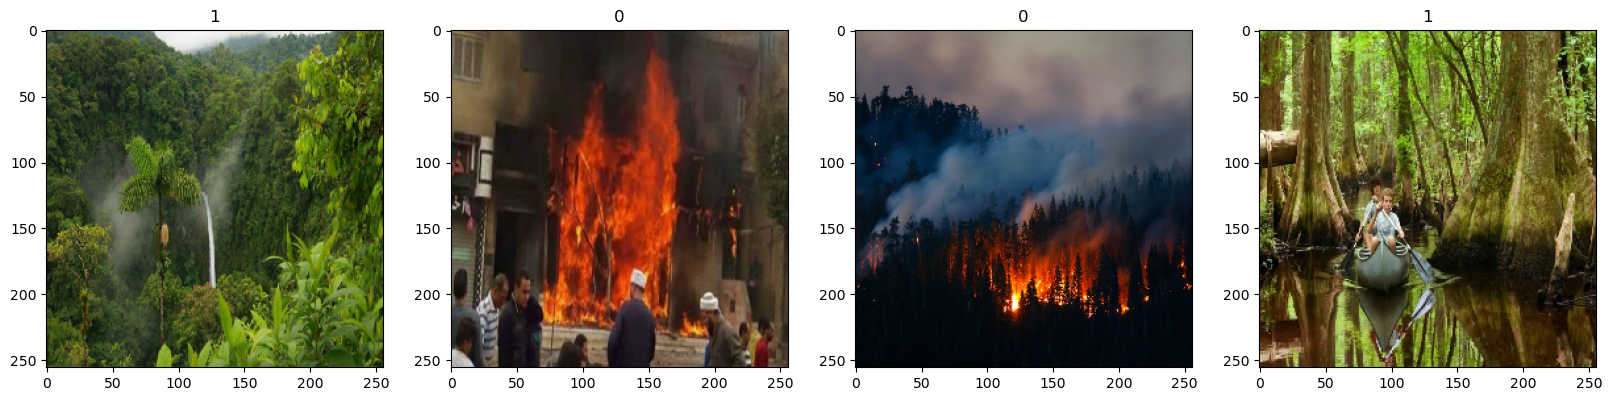

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Transformasi data

image data in the form of a matrix will be converted into a scale of 255 bits. x for the image file and y for the image label (1/0) (1: no fire, 0: there is a fire).

In [14]:
data = data.map(lambda x,y: (x/255, y))

Data that has been uniformed (scaling), converted into a matrix form

In [15]:
data.as_numpy_iterator().next()

(array([[[[2.67059933e-02, 1.49412863e-02, 4.51496206e-02],
          [4.27083336e-02, 3.46507356e-02, 5.46875000e-02],
          [3.41452211e-02, 2.63020825e-02, 3.02236527e-02],
          ...,
          [3.59656252e-02, 2.81224865e-02, 3.20440568e-02],
          [3.15870084e-02, 2.37438735e-02, 2.76654419e-02],
          [3.87408100e-02, 3.08976714e-02, 3.48192416e-02]],
 
         [[3.71476710e-02, 2.53829658e-02, 5.55913001e-02],
          [4.22594249e-02, 3.42018269e-02, 5.42385913e-02],
          [4.70588244e-02, 3.92156877e-02, 4.31372561e-02],
          ...,
          [4.06403169e-02, 3.27971801e-02, 3.67187485e-02],
          [3.59834544e-02, 2.81403195e-02, 3.20618860e-02],
          [3.62438709e-02, 2.84007359e-02, 3.23223025e-02]],
 
         [[4.79932614e-02, 3.62285525e-02, 6.64368868e-02],
          [3.92156877e-02, 3.11580878e-02, 5.11948541e-02],
          [3.89399491e-02, 3.10968142e-02, 3.50183807e-02],
          ...,
          [4.61856611e-02, 3.83425243e-02, 4.2264

### Spliting data

The data will be divided into 2 parts, 70% for training, 20% for validation, and 10% for testing.

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In this dataset, 21 batches were used for training, 6 for validation, and 3 for testing.

In [17]:
print(train_size, val_size, test_size)

21 6 3


The value of the data is stored for the building machine learning process.

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Building ML

we will use the CNN sequential model with library dependencies as follows

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

sequential model was chosen to perform iterations sequentially, this corresponds to the displacement of layers on the CNN.

In [20]:
model = Sequential()

then the data will be trained on 3 layers of Relu to get a fully connected layer. sigmoid activation is used because the range of values ranges from 1-0 (2 classes: fire and no fire).

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

utilising adam's model to see and improve the accuracy of the matrix

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

CNN models that will be trained are as follows

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### Training model

log is used to see the error value and accuracy value for each epoch (train iteration).

In [24]:
logdir='logs'

call the training callbacks function

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

function used for data iteration of 20 epoxy

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


21/21 [==============================] - 29s 1s/step - loss: 0.3657 - accuracy: 0.8452 - val_loss: 0.1412 - val_accuracy: 0.9323
Epoch 2/20
21/21 [==============================] - 26s 1s/step - loss: 0.1353 - accuracy: 0.9494 - val_loss: 0.0901 - val_accuracy: 0.9531
Epoch 3/20
21/21 [==============================] - 26s 1s/step - loss: 0.1285 - accuracy: 0.9509 - val_loss: 0.1495 - val_accuracy: 0.9531
Epoch 4/20
21/21 [==============================] - 26s 1s/step - loss: 0.1677 - accuracy: 0.9360 - val_loss: 0.1416 - val_accuracy: 0.9479
Epoch 5/20
21/21 [==============================] - 27s 1s/step - loss: 0.0939 - accuracy: 0.9613 - val_loss: 0.0737 - val_accuracy: 0.9740
Epoch 6/20
21/21 [==============================] - 27s 1s/step - loss: 0.0660 - accuracy: 0.9777 - val_loss: 0.1001 - val_accuracy: 0.9740
Epoch 7/20
21/21 [==============================] - 27s 1s/step - loss: 0.0507 - accuracy: 0.9836 - val_loss: 0.1159 - val_accuracy: 0.9583
Epoch 8/20
21/21 [=============

### Accuracy measurement

The result of 20 iterations decreases the error rate gradually

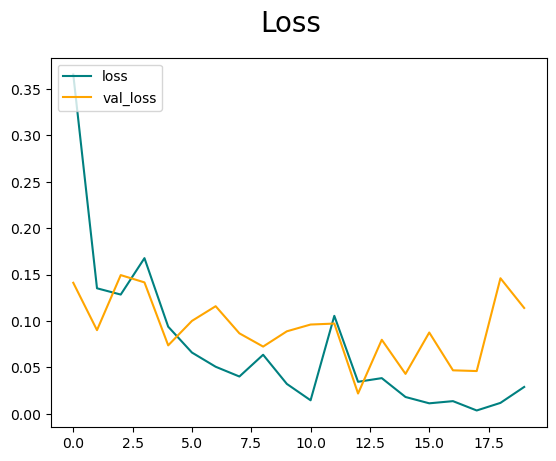

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

The accuracy value is inversely proportional to the error value

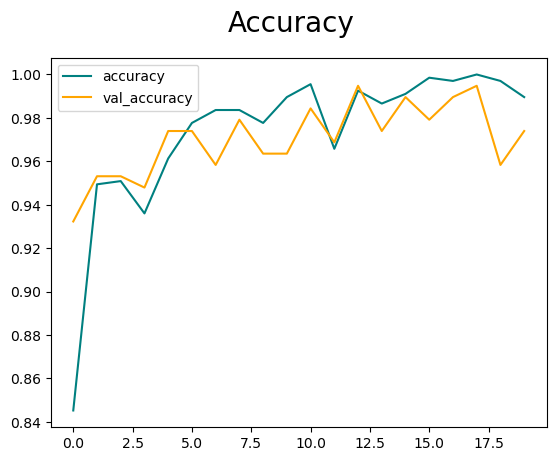

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluation

evaluation is done using precision and recall, as well as accuracy

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

call the function

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

evaluate the testing data

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 184ms/step


precision, recall, and accuracy results of the model

In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.85, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32)


# 10. Testing 

import the required libraries

In [33]:
import cv2

Loading images

test1.jpeg : test forest fire <br>test2.jpeg : forest not fire

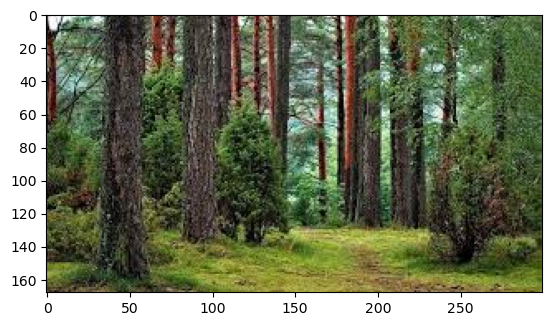

In [34]:
img = cv2.imread('test2.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Image dimension transformation to fit the model

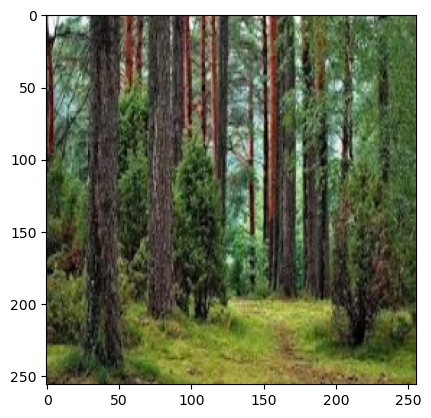

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

calls the prediction model for the testing data

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 90ms/step


results of the test

In [37]:
yhat

array([[0.99871945]], dtype=float32)

indicates that the condition of the forest

In [39]:
if yhat > 0.5: 
    print(f'No fire')
else:
    print(f'Fire')

No fire


The higher the epoxy value, the greater accuracy the model has for each subsequent iteration.